##PyCaret Regression
PyCaret is an open-source, low-code Python library that automates machine learning workflows, significantly speeding up experiments and boosting productivity. It simplifies complex processes by replacing extensive code with concise commands. PyCaret integrates with various machine learning libraries and frameworks, making it accessible for both experienced and novice data scientists.

#  Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

## To start with
PyCaret’s Regression Module is designed for estimating relationships between a target variable and one or more features. It aims to predict continuous values like sales amount, quantity, or temperature. The module offers extensive preprocessing features through the setup function, includes over 25 algorithms, and provides various performance plots.

The typical workflow includes:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

In [3]:
# Get the 'energy' dataset
energy_data = get_data('energy')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Print some info
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
from pycaret.regression import setup

# Initialize PyCaret setup with the correct dataset and target variable
s = setup(energy_data, target='Orientation', session_id=113)


,Description,Value
0,Session id,113
1,Target,Orientation
2,Target type,Regression
3,Original data shape,"(768, 10)"
4,Transformed data shape,"(768, 10)"
5,Transformed train set shape,"(537, 10)"
6,Transformed test set shape,"(231, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


After successful execution of the setup, an information grid is displayed with:

* Session id: Seed for reproducibility; auto-generated if not provided.
* Target type: Automatically detected as Binary, Multiclass, or Regression.
* Original data shape: Dimensions of the untransformed data.
* Transformed train set shape: Dimensions of the training data after transformations.
* Transformed test set shape: Dimensions of the test data after transformations.
* Numeric features: Count of numerical features.
Categorical features: Count of categorical features.







PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [6]:
# import ClassificationExperiment and init the class
from pycaret.regression import RegressionExperiment
experiment = RegressionExperiment()

In [7]:
# check the type of exp
type(experiment)

pycaret.regression.oop.RegressionExperiment

In [8]:
# init setup on exp
experiment.setup(energy_data, target = 'Orientation', session_id = 113)

,Description,Value
0,Session id,113
1,Target,Orientation
2,Target type,Regression
3,Original data shape,"(768, 10)"
4,Transformed data shape,"(768, 10)"
5,Transformed train set shape,"(537, 10)"
6,Transformed test set shape,"(231, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


We can use either the Functional or OOP method, and switch between them as needed. Both methods will yield consistent results, and their outputs have been tested for reliability.

##Compare Models

The compare_models function trains and evaluates all available models in the library using cross-validation. It outputs a scoring grid showing the average performance of each model. You can view the evaluation metrics used during cross-validation with the get_metrics function. Additionally, custom metrics can be added or removed using the add_metric and remove_metric functions.

In [9]:
from pycaret.regression import setup, compare_models, create_model

In [10]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.9821,1.2257,1.1059,-0.0080,0.2577,0.3282,0.0220
en,Elastic Net,0.9824,1.2272,1.1066,-0.0092,0.2579,0.3286,0.0210
lasso,Lasso Regression,0.9839,1.2278,1.1068,-0.0096,0.2580,0.3291,0.0230
llar,Lasso Least Angle Regression,0.9839,1.2278,1.1068,-0.0096,0.2580,0.3291,0.0220
br,Bayesian Ridge,0.9841,1.2280,1.1069,-0.0097,0.2580,0.3292,0.0230
dummy,Dummy Regressor,0.9908,1.2324,1.1088,-0.0125,0.2583,0.3309,0.0350
ridge,Ridge Regression,0.9842,1.2472,1.1152,-0.0251,0.2600,0.3299,0.0260
lr,Linear Regression,0.9848,1.2547,1.1185,-0.0311,0.2607,0.3299,0.6420
huber,Huber Regressor,0.9761,1.2681,1.1247,-0.0446,0.2623,0.3289,0.0470
ada,AdaBoost Regressor,1.0005,1.3000,1.1378,-0.0679,0.2648,0.3339,0.0370


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [11]:
best_model = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9477,1.3006,1.1405,-0.2230,0.2663,0.3261
1,0.9641,1.3025,1.1413,-0.2690,0.2601,0.2969
2,0.9569,1.4240,1.1933,-0.2403,0.2807,0.3385
3,1.1654,1.8117,1.3460,-0.4213,0.3069,0.3671
4,1.2503,2.1159,1.4546,-0.4538,0.3321,0.3966
5,1.0331,1.6196,1.2726,-0.3489,0.3012,0.3667
6,1.0718,1.5459,1.2433,-0.2014,0.2867,0.3529
7,1.0317,1.5120,1.2296,-0.2671,0.2869,0.3556
8,1.0235,1.4542,1.2059,-0.1834,0.2775,0.3426


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The output remains consistent between the functional and OOP APIs. For the rest of the notebook, only the functional API will be demonstrated.

## Analyze Model
we can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases, but here we aldredy have the trained model's.

In [15]:
from pycaret.regression import *

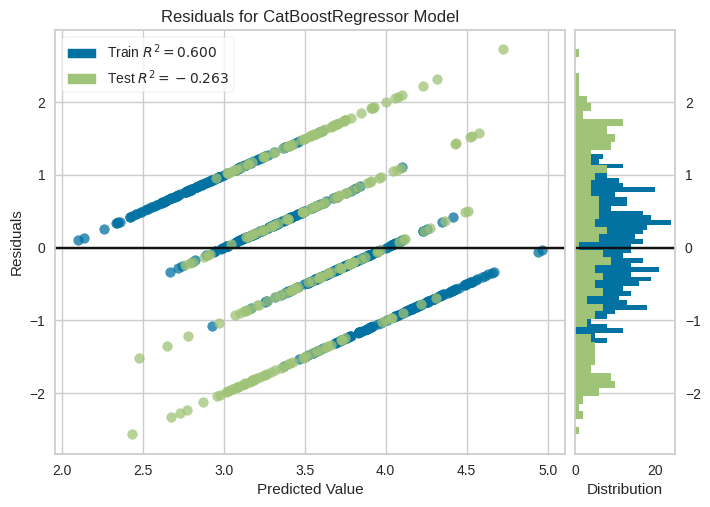

In [16]:
# plot confusion matrix :
plot_model(best_model, plot = 'residuals')

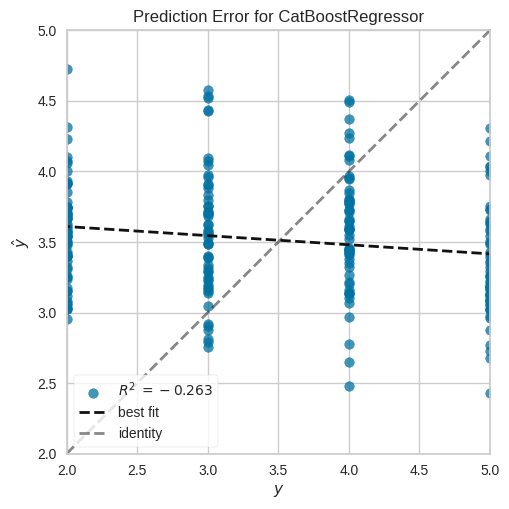

In [17]:
# plot error
plot_model(best_model, plot = 'error')

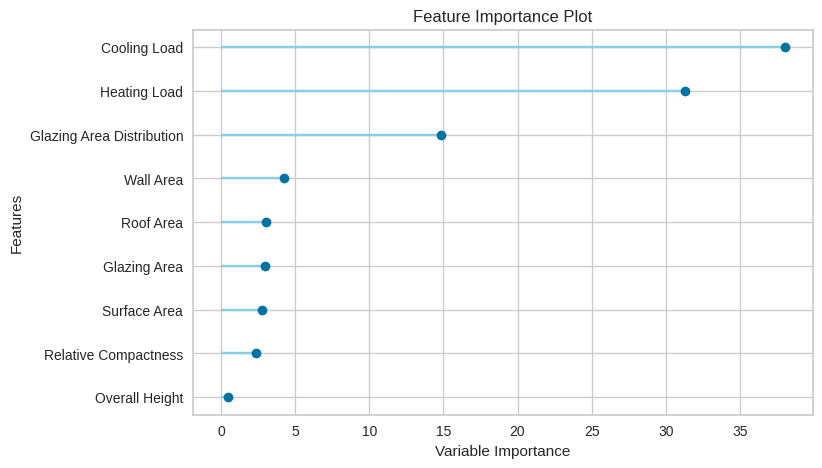

In [18]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [19]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plots (ID - Name):
    
       

An alternative to the plot_model function is evaluate_model, which can only be used in a notebook environment as it relies on ipywidgets.

In [21]:
##The evaluate_model function displays interactive visualizations of various performance metrics for the best-performing model in a notebook environment.
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The predict_model function adds prediction_label and prediction_score (the probability of the predicted class) as new columns to the dataframe. If no data is provided (default), it uses the test set created during the setup phase for predictions.

In [22]:
# predict on test set
test_predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.1043,1.6375,1.2797,-0.2627,0.2968,0.3739


In [32]:
# show predictions df
test_predictions.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Orientation,prediction_label
256,0.79,637.0,343.0,147.0,7.0,0.10,5,37.029999,34.990002,2,3.912908
311,0.76,661.5,416.5,122.5,7.0,0.25,1,36.430000,36.619999,5,3.594260
79,0.71,710.5,269.5,220.5,3.5,0.10,1,10.750000,14.270000,5,3.027275
524,0.62,808.5,367.5,220.5,3.5,0.25,5,13.680000,15.190000,2,3.928698
22,0.76,661.5,416.5,122.5,7.0,0.00,0,24.770000,29.790001,4,2.649771


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the default. We can then use the new data frame without labels for scoring.

In [28]:
# copy data and drop Class variable

New_data = energy_data.copy()
New_data.drop('Overall Height', axis=1, inplace=True)
New_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,2,0.0,0,20.84,28.28


In [34]:
New_data['Overall Height'] = 0

In [35]:
New_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Height
0,0.98,514.5,294.0,110.25,2,0.0,0,15.55,21.33,0
1,0.98,514.5,294.0,110.25,3,0.0,0,15.55,21.33,0
2,0.98,514.5,294.0,110.25,4,0.0,0,15.55,21.33,0
3,0.98,514.5,294.0,110.25,5,0.0,0,15.55,21.33,0
4,0.90,563.5,318.5,122.50,2,0.0,0,20.84,28.28,0


In [36]:
# predict model on new_data
predictions = predict_model(best_model, data = New_data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.7500,0.8339,0.9132,0.3329,0.2145,0.2531


,Relative Compactness,Surface Area,Wall Area,Roof Area,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Height,Orientation,prediction_label
0,0.98,514.5,294.0,110.25,0.0,0,15.55,21.330000,0,2,3.999948
1,0.98,514.5,294.0,110.25,0.0,0,15.55,21.330000,0,3,3.999948
2,0.98,514.5,294.0,110.25,0.0,0,15.55,21.330000,0,4,3.999948
3,0.98,514.5,294.0,110.25,0.0,0,15.55,21.330000,0,5,3.999948
4,0.90,563.5,318.5,122.50,0.0,0,20.84,28.280001,0,2,3.235154


## Save Model
At last, we can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [37]:
# save pipeline
save_model(best_model, 'third_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Relative Compactness',
                                              'Surface Area', 'Wall Area',
                                              'Roof Area', 'Overall Height',
                                              'Glazing Area',
                                              'Glazing Area Distribution',
                                              'Heating Load', 'Cooling Load'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7ecfdcdcf0d0>)]),
 'thir

In [38]:
# load pipeline
loaded_best_pipeline = load_model('third_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Relative Compactness',
                                             'Surface Area', 'Wall Area',
                                             'Roof Area', 'Overall Height',
                                             'Glazing Area',
                                             'Glazing Area Distribution',
                                             'Heating Load', 'Cooling Load'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7ecfdd55ba30>)])